In [5]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.templates.default = "plotly_white"

pd.set_option('display.max_columns', 100)

## Clients

In [6]:
df1 = pd.read_csv("data/Client_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df1.head()

,ÿSalonID,ClientID,FirstName,LastName,Address,City,State,Zip,HomePhone,WorkPhone,Sex,DOB,Anniversary,EMail,Referral,Mailing,Spl_instruction,Total_Visits,Refer_ID,Refer_Name,Balance,Std_Discount,SkinType,HairType,PhotoPath,TimeMark,RowNo,Status,Comment,Client_History,Spl_instruction_desc,Balance_Comment,Skin_desc,Hair_desc,PrivelageCardNo,Privelage_Check,OpeningPoints,ServiceProvider,MostFrequentService,PrivelageTiming,MostFrequentService1,LoyaltyMemberShip_Date,category,sapkey,Create_Date,survey,member_check,MembershipCardNo,Membership_Date,Membership_expiryDate,chksms,Studio_Client,add_on_card,addoncreated_Date,PhotoPath2,CustomerGSTNO,Walletcardno,Walletcheck,mem_card_oth_outlets
0,907,..8220484146,Shankar,NaN,NaN,NaN,NaN,NaN,8220484146,NaN,M,2021-12-27 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2023-10-28 16:15:16.567,63966.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-8220484146,2021-12-27 10:18:52.067,Banners,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
1,907,.8393863665,shubh,NaN,NaN,NaN,NaN,NaN,8393863665,NaN,M,2022-03-02 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2022-03-02 20:32:23.213,64298.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-8393863665,2022-03-02 19:23:29.423,Banners,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
2,907,.9894384197,Rafi,rufi9888800870,NaN,NaN,NaN,NaN,9894384197,NaN,M,2022-10-05 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2023-08-04 17:55:13.310,70781.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Loyal 1,.907-9894384197,2022-10-05 16:58:38.060,EXISTING CLIENTS,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
3,907,.C Balachander9884886817,.C Balachander,NaN,NaN,NaN,NaN,NaN,9884886817,NaN,M,2007-05-03 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2022-04-08 15:25:22.833,37373.0,U,NaN,NaN,00149387,NaN,NaN,NaN,NaN,0.0,NaN,SENTHIL,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-9884886817,2014-11-12 12:50:32.350,Others,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,NaN,NaN,NaN,NaN
4,907,0,Walkin,-Customer,NaN,NaN,NaN,NaN,154,NaN,M,1753-01-01 00:00:00.000,1753-01-01 00:00:00.000,NaN,NaN,NaN,0.0,0.0,0,NaN,0.0,0.0,NaN,NaN,nopicture,2020-03-21 15:28:48.347,2.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,W105-0000080154,NaN,EXISTING CLIENTS,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,nopicture,NaN,NaN,NaN,NaN


In [7]:
df1.describe()

,City,State,WorkPhone,Spl_instruction,Total_Visits,Balance,Std_Discount,SkinType,HairType,RowNo,Comment,Client_History,Balance_Comment,Skin_desc,Hair_desc,PrivelageCardNo,Privelage_Check,OpeningPoints,member_check,chksms,Studio_Client,add_on_card,addoncreated_Date,Walletcheck,mem_card_oth_outlets
count,30.0,0.0,1.180000e+02,26732.000000,1.100000e+01,31.000000,31.0,0.0,0.0,26702.000000,4.000000e+00,0.0,0.0,0.0,0.0,2.0,26671.0,0.0,26672.000000,26672.000000,26672.0,0.0,0.0,16.0,2.605000e+03
mean,0.0,NaN,6.423571e+09,0.146491,7.043405e+05,0.967742,0.0,NaN,NaN,49035.712756,4.516615e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.232304,0.998875,0.0,NaN,NaN,1.0,2.165291e+06
std,0.0,NaN,4.211900e+09,0.353604,4.210434e+05,0.179605,0.0,NaN,NaN,13260.879879,4.408732e+05,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.422309,0.033519,0.0,NaN,NaN,0.0,8.453795e+06
min,0.0,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,NaN,NaN,2.000000,1.425770e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,0.000000,0.0,NaN,NaN,1.0,0.000000e+00
25%,0.0,NaN,3.020775e+04,0.000000,4.963250e+05,1.000000,0.0,NaN,NaN,39308.250000,1.569770e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,2.140460e+05
50%,0.0,NaN,8.939469e+09,0.000000,5.851230e+05,1.000000,0.0,NaN,NaN,45986.500000,2.890700e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,6.340980e+05
75%,0.0,NaN,9.665945e+09,0.000000,1.014850e+06,1.000000,0.0,NaN,NaN,52673.750000,5.837545e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,1.248520e+06
max,0.0,NaN,9.995264e+09,1.000000,1.376456e+06,1.000000,0.0,NaN,NaN,86316.000000,1.085929e+06,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,1.000000,1.000000,0.0,NaN,NaN,1.0,9.952948e+07


## Employees

In [8]:
df2 = pd.read_csv("data/Employee_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df2.head()

,ÿSalonID,EmpID,FirstName,LastName,Address,City,State,Zip,HomePhone,WorkPhone,Mobile,Sex,DOB,Areaofspecialisation,SSN,EMail,Pwd,ShowOnApp,ShowOnSch,AppBookOrder,ShedulingOrder,deactivate,inter,TimeMark,RowNo,Status,Search,doh,EmpAtt
0,907,12751,HABIBUL RAHMAN,12751.0,_,NaN,NaN,NaN,0,0,0,M,1900-01-01 00:00:00.000,HAIR & BEAUTY,NaN,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.030,628.0,U,NaN,2015-03-01 00:00:00.000,0.0
1,907,401367,MADHAN,401367.0,",",NaN,NaN,NaN,NaN,8681840558,8681840558,M,1992-05-30 00:00:00.000,HAIR & BEAUTY,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,614.0,U,NaN,2014-01-01 00:00:00.000,0.0
2,907,402193,SHAMSUDDEEN,402193.0,_,NaN,NaN,NaN,NaN,0,0,M,2013-06-03 00:00:00.000,HAIR & BEAUTY,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,593.0,U,NaN,2013-08-28 00:00:00.000,0.0
3,907,402194,SURAJ GURUNG,402194.0,_,NaN,NaN,NaN,NaN,8939344586,8939344586,M,2013-07-29 00:00:00.000,BEAUTICIAN,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,594.0,U,NaN,2013-08-28 00:00:00.000,0.0
4,907,402195,DIPENGIRI,402195.0,_,NaN,NaN,NaN,NaN,9176741589,9176741589,M,2013-08-14 00:00:00.000,STYLIST,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.023,595.0,U,NaN,2013-08-28 00:00:00.000,0.0


## Service Sales

In [9]:
df3 = pd.read_csv("data/Ticket_Product_Details_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df3.head()

,ÿSalonID,TicketID,ProdID,EmpID,Type,Descr,Qty,Tax,BackBar,Retail_Price,Discount_Amt,Discount_Perct,Total,Start_Time,wid,bomreference,TimeMark,RowNo,Status,Billformat,luxurytax,Studio_Status,Mem_Disc,Oth_Disc,Created_Date2
0,907,1,GHHCUTNR,9079999.0,S,HAIRCUT (GENTS),1.0,12.36,NaN,130.0,0.0,0,146.07,27-08-2013 18:12,501,NaN,43:59.0,205478.0,U,D,0.0,N,0.0,0.0,00:00.0
1,907,2,LHHCUTAD,9079999.0,S,"HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)",1.0,12.36,NaN,400.0,0.0,0,449.44,28-08-2013 10:50,502,NaN,43:59.0,205479.0,U,D,0.0,N,0.0,0.0,00:00.0
2,907,2,LSTHDGEB,9079999.0,S,THREADING - EYEBROWS (LADIES),1.0,12.36,NaN,25.0,0.0,0,28.09,28-08-2013 10:50,502,NaN,43:59.0,205480.0,U,D,0.0,N,0.0,0.0,00:00.0
3,907,3,LBMANIFR,9079999.0,S,MANICURE - FRENCH (LADIES),1.0,12.36,NaN,260.0,0.0,0,292.14,28-08-2013 10:54,502,NaN,43:59.0,205482.0,U,D,0.0,N,0.0,0.0,00:00.0
4,907,3,LSTHDGEB,9079999.0,S,THREADING - EYEBROWS (LADIES),1.0,12.36,NaN,25.0,0.0,0,28.09,28-08-2013 10:53,502,NaN,43:59.0,205481.0,U,D,0.0,N,0.0,0.0,00:00.0


In [10]:
df3.describe()

,TicketID,EmpID,Qty,Tax,Retail_Price,Discount_Amt,Total,bomreference,RowNo,luxurytax,Mem_Disc,Oth_Disc
count,290856.000000,2.887600e+05,288760.000000,288760.00000,288760.000000,286664.000000,288760.000000,2113.0,288760.000000,286664.0,286664.000000,286664.000000
mean,73287.731826,1.131305e+06,1.024990,17.15180,348.519252,50.640623,4290.676384,0.0,353845.174522,0.0,41.859250,6.492284
std,41613.854744,2.118174e+06,0.483829,19.83383,642.896567,117.391441,46058.112617,0.0,99347.945814,0.0,98.779606,57.881897
min,1.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-240.000000
25%,37144.750000,4.100190e+05,1.000000,14.00000,55.000000,5.000000,59.000000,0.0,275640.750000,0.0,0.000000,0.000000
50%,74705.500000,4.126340e+05,1.000000,18.00000,150.000000,15.000000,147.500000,0.0,347830.500000,0.0,15.000000,0.000000
75%,112211.000000,9.019110e+05,1.000000,18.00000,280.000000,35.000000,295.000000,0.0,420020.250000,0.0,35.000000,0.000000
max,140155.000000,9.079999e+06,35.000000,3245.00000,20199.000000,4632.000000,564016.000000,0.0,564055.000000,0.0,2875.000000,4625.000000


In [11]:
df4 = pd.read_csv("data/Tickets_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df4.head()

,ÿSalonID,TicketID,ClientID,SchDate,Referral,Total,Created_Date,Total_WithoutTax,printed,bomreferenceindex,TimeMark,RowNo,Status,Serviceslipno,servicedesc,BillStatus
0,907,1,JERRY9940060569,2013-08-27 00:00:00.000,Request,146.07,2013-08-27 00:00:00.000,130.0,0.0,NaN,2013-08-27 18:13:22.023,108263.0,i,1111111.0,HAIRCUT (GENTS),Closed
1,907,2,Saranya9884402095,2013-08-28 00:00:00.000,Request,477.53,2013-08-28 00:00:00.000,425.0,0.0,NaN,2013-08-28 10:52:27.833,108264.0,i,111112.0,"HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)/...",Closed
2,907,3,Lakshmi rajkumar9176222704,2013-08-28 00:00:00.000,Request,320.23,2013-08-28 00:00:00.000,285.0,0.0,NaN,2013-08-28 10:55:35.253,108265.0,i,111113.0,THREADING - EYEBROWS (LADIES)/MANICURE - FRENC...,Closed
3,907,4,Vaishali8056111666,2013-08-28 00:00:00.000,Request,56.18,2013-08-28 00:00:00.000,50.0,0.0,NaN,2013-08-28 10:57:18.620,108266.0,i,111114.0,THREADING - EYEBROWS (LADIES)/THREADING - UPPE...,Closed
4,907,5,Sudeep9381057770,2013-08-28 00:00:00.000,Request,95.51,2013-08-28 00:00:00.000,85.0,0.0,NaN,2013-08-28 10:58:54.560,108267.0,i,111115.0,KIDS CUT - BELOW 10 YEARS - WEEK DAYS (GENTS),Closed


# Customer Segmentation

### RFM Analysis

By creating segments, businesses can tailor their marketing efforts, product offerings, and customer service experiences to better meet the specific needs of each segment.

Questions:
- Who are frequent customers?
- Who are recent (new) customers?
- Who are high-paying customers
- What are the services purchased by the 3 groups?

### Total Transactions per Customer

1. Sum number of services taken by customer

In [14]:
# Try to convert the 'column_name' to int64, handling errors
try:
    df4['TicketID'] = df4['TicketID'].astype('int64')
except ValueError:
    # Handle non-numeric values, for example, replacing them with NaN
    df4['TicketID'] = pd.to_numeric(df4['TicketID'], errors='coerce')

#print(df4.dtypes)

In [15]:
df3['NumServices'] = df3.groupby('TicketID')['TicketID'].transform('count')

In [16]:
# Selecting specific columns from each DataFrame
df3_subset = df3[['TicketID', 'NumServices']]
df4_subset = df4[['TicketID', 'ClientID', 'Total']]

# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(df3_subset, df4_subset, on='TicketID', how='right')

In [17]:
sales_df = sales_df.drop_duplicates(subset=['TicketID'])

In [18]:
sales_df.sample(4)

,TicketID,NumServices,ClientID,Total
239083,120030.0,4.0,Prithvi9444619923,1403.02
202412,103966.0,2.0,Anitha9176668202,389.40
117688,60504.0,5.0,AKSHAYA8056903105,1500.75
269453,130893.0,2.0,sathya9941298247,118.00


In [19]:
sales_df = sales_df.groupby('ClientID').agg({'NumServices': 'sum', 'Total': 'sum'}).reset_index()
sales_df.rename(columns={'Total': 'total_spending'}, inplace=True)
sales_df.sample(4)

,ClientID,NumServices,total_spending
12694,anandh9444281787,4.0,4831.48
10037,Shivakumar9944340677,1.0,308.99
1880,Chellapa9791099079,3.0,705.07
25458,vijay9283270297,2.0,384.00


In [20]:
sales_df.describe()

,NumServices,total_spending
count,26044.00000,26044.000000
mean,11.16787,3922.545035
std,28.03605,10693.714313
min,1.00000,0.000000
25%,2.00000,277.300000
50%,4.00000,1003.000000
75%,9.00000,3497.815000
max,2065.00000,435922.100000


In [21]:
current_date = datetime.now()
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['age'] = np.floor((current_date - df1['DOB']).dt.days / 365.25)

In [22]:
df1_subset = df1[['ClientID', 'Sex', 'age', 'HomePhone']]
df1_subset

,ClientID,Sex,age,HomePhone
0,..8220484146,M,2.0,8220484146
1,.8393863665,M,1.0,8393863665
2,.9894384197,M,1.0,9894384197
3,.C Balachander9884886817,M,16.0,9884886817
4,0,M,270.0,154
...,...,...,...,...
26729,Zion9500109746,F,16.0,9500109746
26730,ZOHARA9150721951,F,11.0,9150721951
26731,ztya9884450626,M,5.0,9884450626
26732,zubair8220237654,M,4.0,8220237654


In [23]:
# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(sales_df, df1_subset, on='ClientID', how='left')
len(sales_df)

26044

In [24]:
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone
0,..8220484146,4.0,4425.90,M,2.0,8220484146
1,.8393863665,3.0,495.60,M,1.0,8393863665
2,.9894384197,18.0,7776.20,M,1.0,9894384197
3,.C Balachander9884886817,11.0,3250.73,M,16.0,9884886817
4,0,662.0,186160.58,M,270.0,154
...,...,...,...,...,...,...
26039,ziaulhAQ9943699607,4.0,736.00,M,7.0,9943699607
26040,zil7373165752,13.0,1917.50,M,4.0,7373165752
26041,ztya9884450626,1.0,212.40,M,5.0,9884450626
26042,zubair8220237654,4.0,3256.80,M,4.0,8220237654


In [25]:
selected_columns = ["NumServices", "age", "total_spending", "age"]
correlation_matrix = sales_df[selected_columns].corr().round(2)
correlation_matrix

,NumServices,age,total_spending,age
NumServices,1.00,0.18,0.73,0.18
age,0.18,1.00,0.11,1.00
total_spending,0.73,0.11,1.00,0.11
age,0.18,1.00,0.11,1.00


<Axes: >

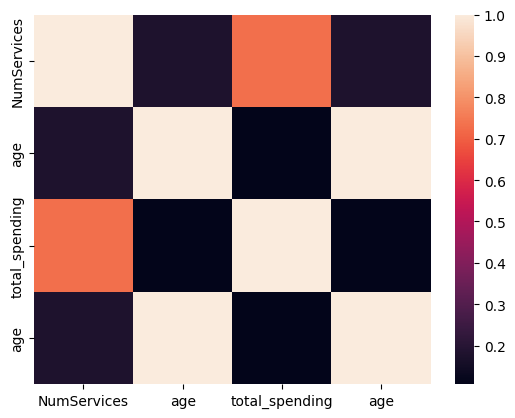

In [26]:
sns.heatmap(sales_df[selected_columns].corr())

In [27]:
grouped = sales_df.groupby('Sex')['total_spending'].median()
grouped

Sex
F    1233.10
M     855.50
f    1112.00
m    1060.82
Name: total_spending, dtype: float64

In [28]:
sales_df['Sex'] = sales_df['Sex'].apply(lambda x: str(x).upper())

In [29]:
# Drop rows where 'Sex' is NaN
sales_df['Sex'] = sales_df['Sex'].replace("NAN", np.nan)
sales_df_filtered = sales_df[sales_df['Sex'].notna()]

# Group by 'Sex' and calculate the median total spending
grouped = sales_df_filtered.groupby('Sex')['total_spending'].median()
grouped

Sex
F    1232.51
M     855.94
Name: total_spending, dtype: float64

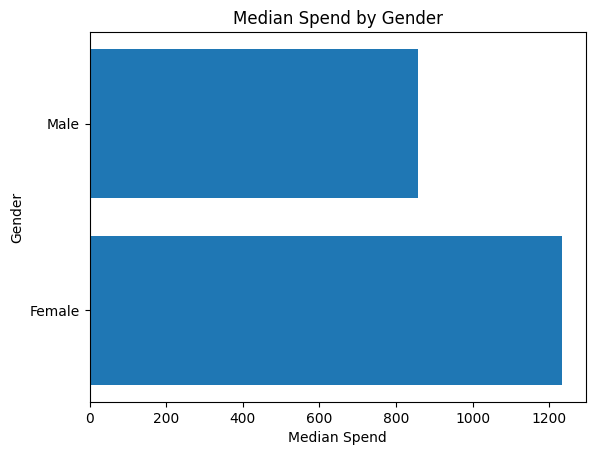

In [30]:
gender_labels = {
    "F": 'Female',
    "M": 'Male'
}

plt.barh([gender_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Spend')
plt.ylabel('Gender')
plt.title('Median Spend by Gender')

plt.show()

#### Calculating Recency, Frequency and Monetory

In [31]:
df4['Created_Date'] = pd.to_datetime(df4['Created_Date'])

# Calculate recency
current_date = datetime.now()
df4['Recency'] = (current_date - df4.groupby('ClientID')['Created_Date'].transform('max')).dt.days

In [32]:
recency_df = df4[['ClientID', 'Recency']]

In [33]:
sales_df = pd.merge(sales_df, recency_df, on='ClientID', how='left')
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency
0,..8220484146,4.0,4425.9,M,2.0,8220484146,61.0
1,..8220484146,4.0,4425.9,M,2.0,8220484146,61.0
2,..8220484146,4.0,4425.9,M,2.0,8220484146,61.0
3,.8393863665,3.0,495.6,M,1.0,8393863665,666.0
4,.9894384197,18.0,7776.2,M,1.0,9894384197,188.0
...,...,...,...,...,...,...,...
140150,zil7373165752,13.0,1917.5,M,4.0,7373165752,753.0
140151,ztya9884450626,1.0,212.4,M,5.0,9884450626,1960.0
140152,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1676.0
140153,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1676.0


In [34]:
sales_df["Monetary"] = sales_df["total_spending"]
sales_df["Frequency"] = sales_df["NumServices"]
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency
0,..8220484146,4.0,4425.9,M,2.0,8220484146,61.0,4425.9,4.0
1,..8220484146,4.0,4425.9,M,2.0,8220484146,61.0,4425.9,4.0
2,..8220484146,4.0,4425.9,M,2.0,8220484146,61.0,4425.9,4.0
3,.8393863665,3.0,495.6,M,1.0,8393863665,666.0,495.6,3.0
4,.9894384197,18.0,7776.2,M,1.0,9894384197,188.0,7776.2,18.0
...,...,...,...,...,...,...,...,...,...
140150,zil7373165752,13.0,1917.5,M,4.0,7373165752,753.0,1917.5,13.0
140151,ztya9884450626,1.0,212.4,M,5.0,9884450626,1960.0,212.4,1.0
140152,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1676.0,3256.8,4.0
140153,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1676.0,3256.8,4.0


In [35]:
sales_df = sales_df.drop_duplicates()
len(sales_df)

26044

In [36]:
scaler = MinMaxScaler()
sales_df['RecencyScore'] = scaler.fit_transform(sales_df[['Recency']])
sales_df['FrequencyScore'] = scaler.fit_transform(sales_df[['Frequency']])
sales_df['MonetaryScore'] = scaler.fit_transform(sales_df[['Monetary']])

sales_df.sample(4)

/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_9198/2301937299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['RecencyScore'] = scaler.fit_transform(sales_df[['Recency']])
/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_9198/2301937299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['FrequencyScore'] = scaler.fit_transform(sales_df[['Frequency']])
/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_9198/2301937299.py:4: SettingWithCopyWarning: 
A valu

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore
33209,Mullai Vendan9884881716,15.0,7711.30,M,6.0,9884881716,500.0,7711.30,15.0,0.122252,0.006783,0.017690
117106,sai kumar8374419991,1.0,108.30,M,16.0,8374419991,3110.0,108.30,1.0,0.821984,0.000000,0.000248
101410,mithila9363291404,2.0,206.50,F,25.0,9363291404,343.0,206.50,2.0,0.080161,0.000484,0.000474
2033,ARUN9444035452,2.0,274.81,M,16.0,9444035452,2941.0,274.81,2.0,0.776676,0.000484,0.000630


In [37]:
sales_df.describe()

,NumServices,total_spending,age,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore
count,26044.00000,26044.000000,26044.000000,26044.000000,26044.000000,26044.00000,26044.000000,26044.000000,26044.000000
mean,11.16787,3922.545035,46.329750,1768.405736,3922.545035,11.16787,0.462307,0.004926,0.008998
std,28.03605,10693.714313,92.358857,1099.426859,10693.714313,28.03605,0.294753,0.013583,0.024531
min,1.00000,0.000000,0.000000,44.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,2.00000,277.300000,4.000000,724.000000,277.300000,2.00000,0.182306,0.000484,0.000636
50%,4.00000,1003.000000,7.000000,1815.000000,1003.000000,4.00000,0.474799,0.001453,0.002301
75%,9.00000,3497.815000,16.000000,2695.000000,3497.815000,9.00000,0.710724,0.003876,0.008024
max,2065.00000,435922.100000,270.000000,3774.000000,435922.100000,2065.00000,1.000000,1.000000,1.000000


In [38]:
sales_df['RFM_score'] = sales_df['RecencyScore'] * 10 + sales_df['MonetaryScore'] * 100 + sales_df['FrequencyScore'] * 100
sales_df.sample(3) 

/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_9198/3961971693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['RFM_score'] = sales_df['RecencyScore'] * 10 + sales_df['MonetaryScore'] * 100 + sales_df['FrequencyScore'] * 100


,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score
98473,mahalakshmi8438551937,1.0,28.0,F,270.0,8438551937,3693.0,28.0,1.0,0.978284,0.000000,0.000064,9.789265
47664,Ranjith8056994609,24.0,4301.1,M,2.0,8056994609,77.0,4301.1,24.0,0.008847,0.011143,0.009867,2.189480
110336,priya9789071494,2.0,69.9,F,6.0,9789071494,2315.0,69.9,2.0,0.608847,0.000484,0.000160,6.152956


In [39]:
segment_labels = ["Low_Value", "Mid-Value", "High-Value"]
sales_df["Value Segment"] = pd.qcut(sales_df["RFM_score"], q=3, labels=segment_labels)

/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_9198/3934023042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df["Value Segment"] = pd.qcut(sales_df["RFM_score"], q=3, labels=segment_labels)


In [40]:
sales_df.sample(3)

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment
76052,arunkumar9600086451,3.0,590.13,M,16.0,9600086451,292.0,590.13,3.0,0.066488,0.000969,0.001354,0.897154,Low_Value
101176,meenakshi9677198727,8.0,3087.00,F,270.0,9677198727,3679.0,3087.00,8.0,0.974531,0.003391,0.007082,10.792610,High-Value
91650,kala priya8098839904,7.0,3634.40,M,4.0,8098839904,109.0,3634.40,7.0,0.017426,0.002907,0.008337,1.298687,Low_Value


In [41]:
sales_df['RFM_score'].describe()

count    26044.000000
mean         6.015528
std          4.169900
min          0.014862
25%          3.243380
50%          5.917164
75%          8.157404
max        123.963599
Name: RFM_score, dtype: float64

In [42]:
sales_df["RFM Customer Segments"] = ""

sales_df.loc[sales_df["RFM_score"] >= 10, "RFM Customer Segments"] = "Champions"
sales_df.loc[(sales_df["RFM_score"] >= 5) & (sales_df["RFM_score"] < 10), "RFM Customer Segments"] = "Potential Loyalists"
sales_df.loc[(sales_df['RFM_score'] >= 1) & (sales_df['RFM_score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
sales_df.loc[(sales_df['RFM_score'] < 1), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
sales_df.sample(3)

/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_9198/486289812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df["RFM Customer Segments"] = ""


,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
53030,SRIKAHAN9841686786,1.0,575.00,M,6.0,9841686786,2399.0,575.00,1.0,0.631367,0.000000,0.001319,6.445577,Mid-Value,Potential Loyalists
31349,Manoj8489123842,3.0,1551.70,M,32.0,8489123842,472.0,1551.70,3.0,0.114745,0.000969,0.003560,1.600310,Low_Value,Can't Lose
5878,Aravind7550070567,20.0,8127.62,M,5.0,7550070567,1055.0,8127.62,20.0,0.271046,0.009205,0.018645,5.495465,Mid-Value,Potential Loyalists


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


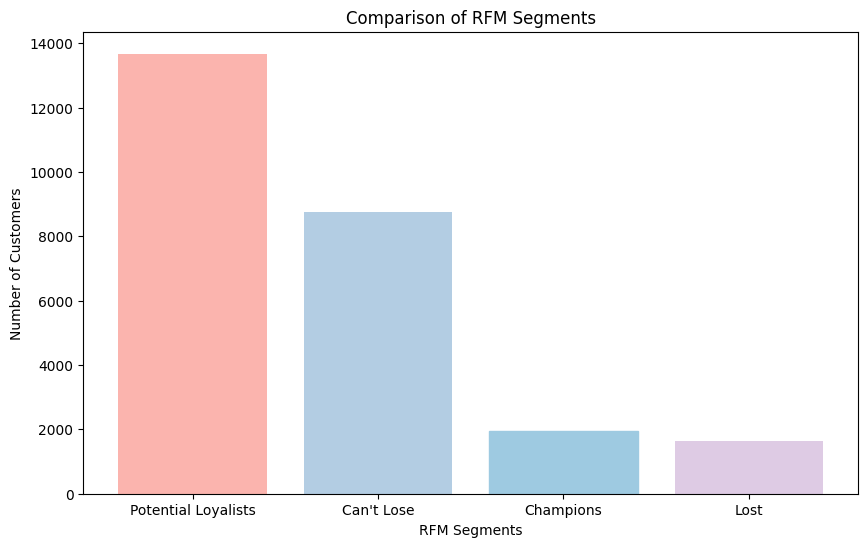

In [43]:
# Assuming you have a DataFrame named sales_df
segment_counts = sales_df['RFM Customer Segments'].value_counts()

# Define pastel colors
pastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))

# Set the color for the 'Champions' segment
champions_color = (158/255, 202/255, 225/255)  # RGB values

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)

# Set the color for the 'Champions' segment
for bar, segment in zip(bars, segment_counts.index):
    if segment == 'Champions':
        bar.set_color(champions_color)

# Set labels and title
plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

# Hide the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

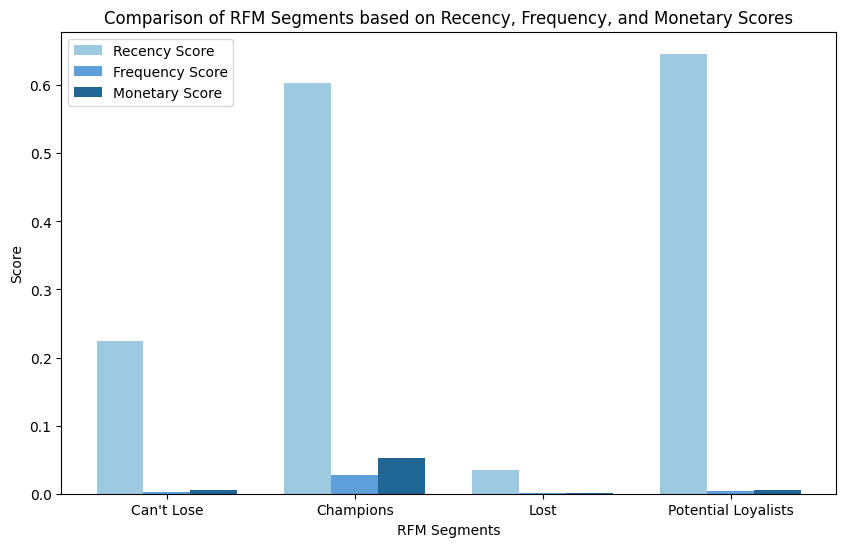

In [44]:
# Assuming you have a DataFrame named sales_df
segment_scores = sales_df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Define colors
colors = [(158/255, 202/255, 225/255), (94/255, 158/255, 217/255), (32/255, 102/255, 148/255)]

# Create a bar chart with Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
bar_positions = np.arange(len(segment_scores['RFM Customer Segments']))

ax.bar(bar_positions - bar_width, segment_scores['RecencyScore'], bar_width, label='Recency Score', color=colors[0])
ax.bar(bar_positions, segment_scores['FrequencyScore'], bar_width, label='Frequency Score', color=colors[1])
ax.bar(bar_positions + bar_width, segment_scores['MonetaryScore'], bar_width, label='Monetary Score', color=colors[2])

# Set labels and title
ax.set_title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')
ax.set_xlabel('RFM Segments')
ax.set_ylabel('Score')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(segment_scores['RFM Customer Segments'])

# Show legend
ax.legend()

# Show the plot
plt.show()

In [48]:
champions_df = sales_df[sales_df['RFM Customer Segments'] == 'Champions']
champions_df.to_csv("outputs/champions.csv")
champions_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
15,0,662.0,186160.58,M,270.0,154,1377.0,186160.58,662.0,0.357373,0.320252,0.427050,78.303931,High-Value,Champions
550,AARTHI9962529745,16.0,1724.24,F,270.0,9962529745,3634.0,1724.24,16.0,0.962466,0.007267,0.003955,10.746948,High-Value,Champions
594,ABIRAMI9940054547,17.0,9568.33,F,16.0,9940054547,2998.0,9568.33,17.0,0.791957,0.007752,0.021950,10.889728,High-Value,Champions
627,ABRAHIM9494332499,2.0,224.72,M,270.0,9494332499,3770.0,224.72,2.0,0.998928,0.000484,0.000516,10.089276,High-Value,Champions
635,ADITHYA9840533671,79.0,29222.70,M,16.0,9840533671,1386.0,29222.70,79.0,0.359786,0.037791,0.067037,14.080577,High-Value,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139876,yasodha8197687568,72.0,37447.31,F,4.0,8197687568,785.0,37447.31,72.0,0.198660,0.034399,0.085904,14.016885,High-Value,Champions
139951,ylese9952944777,51.0,11802.32,F,270.0,9952944777,3431.0,11802.32,51.0,0.908043,0.024225,0.027074,14.210347,High-Value,Champions
139996,yogavel9791162769,2.0,0.00,M,270.0,9791162769,3768.0,0.00,2.0,0.998391,0.000484,0.000000,10.032364,High-Value,Champions
140040,yuvarai9629670404,50.0,14650.01,F,7.0,9629670404,1650.0,14650.01,50.0,0.430563,0.023740,0.033607,10.040356,High-Value,Champions


In [51]:
potloyalists_df = sales_df[sales_df['RFM Customer Segments'] == 'Potential Loyalists']
potloyalists_df.to_csv("outputs/potential_loyalists.csv")
potloyalists_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
502,A Velu9556186556,1.0,189.75,M,6.0,9556186556,2503.0,189.75,1.0,0.659249,0.000000,0.000435,6.636022,Mid-Value,Potential Loyalists
503,A. Dileep Kumar9543295687,4.0,886.52,M,16.0,9543295687,3428.0,886.52,4.0,0.907239,0.001453,0.002034,9.421102,High-Value,Potential Loyalists
505,A. Vijaya Ragava Boo8754418338,57.0,7728.40,M,16.0,8754418338,1412.0,7728.40,57.0,0.366756,0.027132,0.017729,8.153624,High-Value,Potential Loyalists
534,AABBAS8939570786,3.0,342.00,M,16.0,8939570786,3073.0,342.00,3.0,0.812064,0.000969,0.000785,8.295997,High-Value,Potential Loyalists
538,AARON9884439553,1.0,136.80,M,16.0,9884439553,3005.0,136.80,1.0,0.793834,0.000000,0.000314,7.969720,High-Value,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140134,zaher 9445917386,1.0,79.80,M,16.0,9445917386,3063.0,79.80,1.0,0.809383,0.000000,0.000183,8.112140,High-Value,Potential Loyalists
140141,zeeitnh9787005667,1.0,28.09,F,16.0,9787005667,3470.0,28.09,1.0,0.918499,0.000000,0.000064,9.191430,High-Value,Potential Loyalists
140143,ziaulhAQ9943699607,4.0,736.00,M,7.0,9943699607,2651.0,736.00,4.0,0.698928,0.001453,0.001688,7.303462,Mid-Value,Potential Loyalists
140151,ztya9884450626,1.0,212.40,M,5.0,9884450626,1960.0,212.40,1.0,0.513673,0.000000,0.000487,5.185454,Mid-Value,Potential Loyalists


In [53]:
potloyalists_df['total_spending'].sum()

36125840.98

In [55]:
cantlose_df = sales_df[sales_df['RFM Customer Segments'] == 'Can\'t Lose']
cantlose_df.to_csv("outputs/cant_lose.csv")
cantlose_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
0,..8220484146,4.0,4425.90,M,2.0,8220484146,61.0,4425.90,4.0,0.004558,0.001453,0.010153,1.206221,Low_Value,Can't Lose
3,.8393863665,3.0,495.60,M,1.0,8393863665,666.0,495.60,3.0,0.166756,0.000969,0.001137,1.878150,Low_Value,Can't Lose
4,.9894384197,18.0,7776.20,M,1.0,9894384197,188.0,7776.20,18.0,0.038606,0.008236,0.017839,2.993553,Low_Value,Can't Lose
11,.C Balachander9884886817,11.0,3250.73,M,16.0,9884886817,776.0,3250.73,11.0,0.196247,0.004845,0.007457,3.192676,Low_Value,Can't Lose
536,AADHI8220484602,5.0,389.40,M,1.0,8220484602,431.0,389.40,5.0,0.103753,0.001938,0.000893,1.320660,Low_Value,Can't Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140135,zahir 9790659759,10.0,8810.13,M,1.0,9790659759,158.0,8810.13,10.0,0.030563,0.004360,0.020210,2.762710,Low_Value,Can't Lose
140139,zahir9677994532,4.0,3245.00,M,11.0,9677994532,429.0,3245.00,4.0,0.103217,0.001453,0.007444,1.921919,Low_Value,Can't Lose
140142,zepy9884050626,2.0,354.00,M,4.0,9884050626,1812.0,354.00,2.0,0.473995,0.000484,0.000812,4.869603,Mid-Value,Can't Lose
140144,zil7373165752,13.0,1917.50,M,4.0,7373165752,753.0,1917.50,13.0,0.190080,0.005814,0.004399,2.922072,Low_Value,Can't Lose


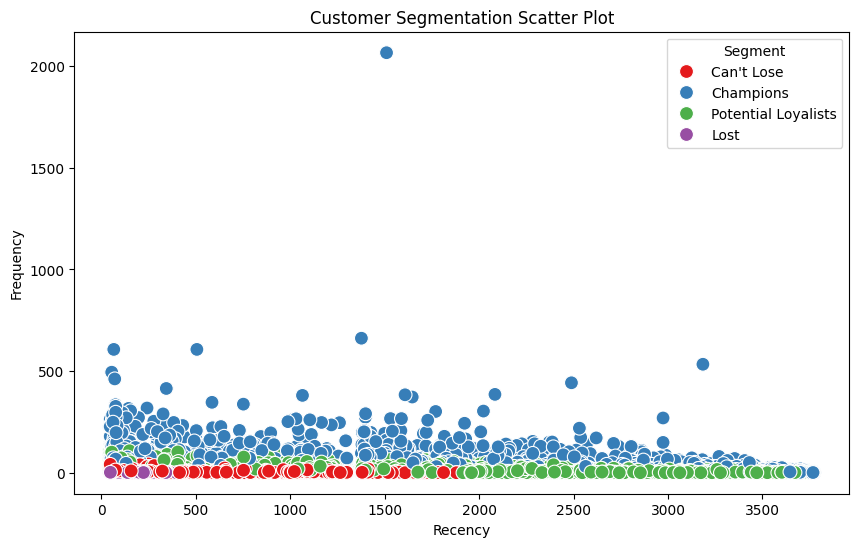

In [56]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='RFM Customer Segments',
    data=sales_df,
    palette='Set1',  
    s=100,  
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment', loc='upper right')
plt.show()